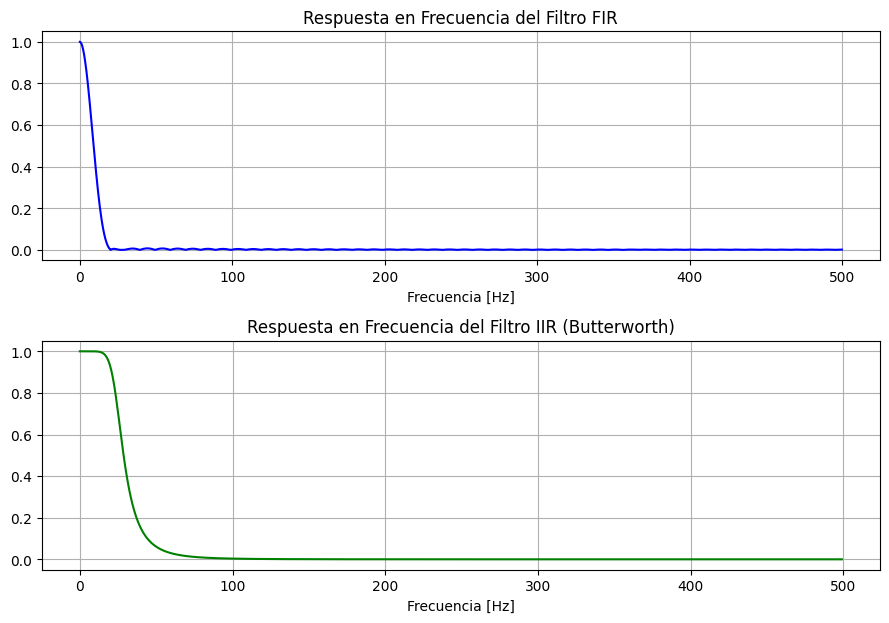

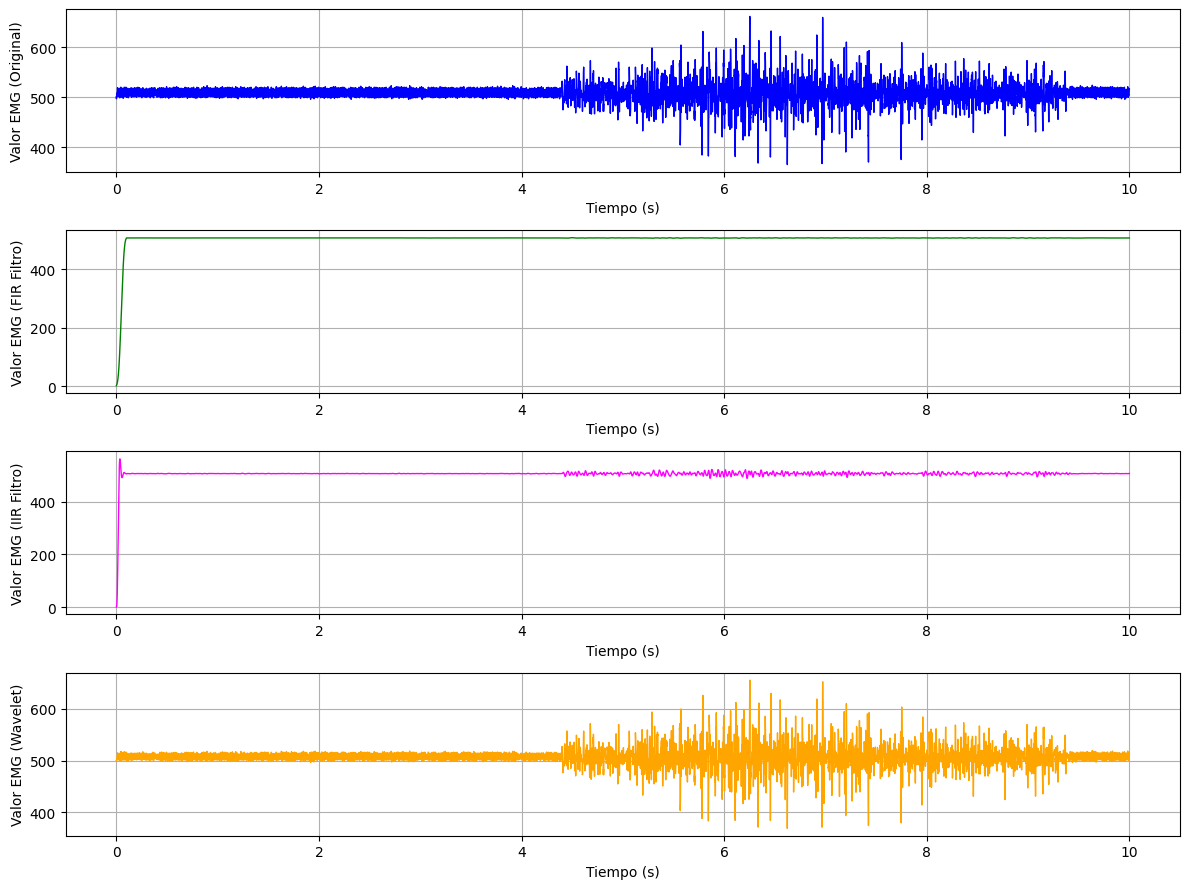

SNR para el filtro FIR: 22.60 dB
SNR para el filtro IIR: 24.95 dB
SNR para el filtro Wavelet: 47.03 dB


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt

# Función para calcular la SNR utilizando la fórmula del paper
def calculate_snr(denoised_signal, original_signal):
    signal_power = np.mean(denoised_signal ** 2)
    noise_power = np.mean((original_signal - denoised_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Función para aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposicion
def wavelet_denoising(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
    return denoised_signal

# Cargar los datos desde el archivo TXT
archivo_txt = "text_EMG.txt"
datos_emg = np.loadtxt(archivo_txt)
emg = datos_emg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(emg)) / frecuencia_muestreo

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.05
cutoff_frequency_iir = 0.05

# Diseñar filtros
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()

# Aplicar los filtros
emg_fir = lfilter(fir_filter, 1.0, emg)
emg_iir = lfilter(iir_filter[0], iir_filter[1], emg)

# Aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposicion
emg_wavelet = wavelet_denoising(emg, wavelet='db4', level=3)

# Define el intervalo de tiempo para visualizar (segundos) en reposo
inicio_segundo = 0
fin_segundo = 10
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas en reposo
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (FIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (IIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_wavelet[inicio_muestra:fin_muestra], lw=1, color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Wavelet)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular y mostrar la SNR para cada filtro utilizando la fórmula del paper
snr_fir = calculate_snr(emg_fir[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])
snr_iir = calculate_snr(emg_iir[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])
snr_wavelet = calculate_snr(emg_wavelet[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])

print(f"SNR para el filtro FIR: {snr_fir:.2f} dB")
print(f"SNR para el filtro IIR: {snr_iir:.2f} dB")
print(f"SNR para el filtro Wavelet: {snr_wavelet:.2f} dB")


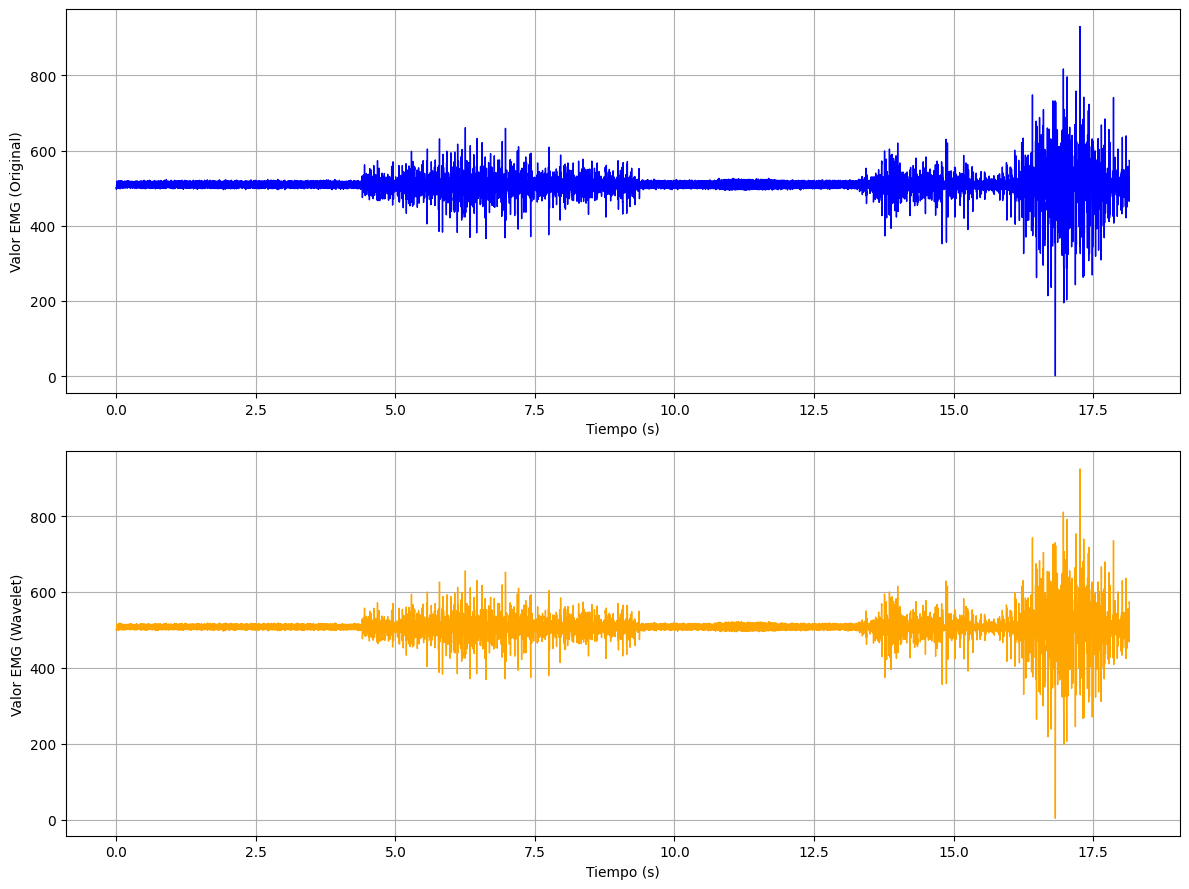

SNR para el filtro Wavelet: 46.94 dB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt

# Función para calcular la SNR utilizando la fórmula del paper
def calculate_snr(denoised_signal, original_signal):
    signal_power = np.mean(denoised_signal ** 2)
    noise_power = np.mean((original_signal - denoised_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Función para aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposicion
def wavelet_denoising(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
    return denoised_signal

# Cargar los datos desde el archivo TXT
archivo_txt = "text_EMG.txt"
datos_emg = np.loadtxt(archivo_txt)
emg = datos_emg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(emg)) / frecuencia_muestreo

# Aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposicion
emg_wavelet = wavelet_denoising(emg, wavelet='db4', level=3)

# Define el intervalo de tiempo para visualizar la señal completa
inicio_segundo = 0
fin_segundo = len(emg) / frecuencia_muestreo
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas en la señal completa
plt.figure(figsize=(12, 9))
plt.subplot(2, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_wavelet[inicio_muestra:fin_muestra], lw=1, color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Wavelet)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular y mostrar la SNR para cada filtro utilizando la fórmula del paper
snr_wavelet = calculate_snr(emg_wavelet[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])

print(f"SNR para el filtro Wavelet: {snr_wavelet:.2f} dB")

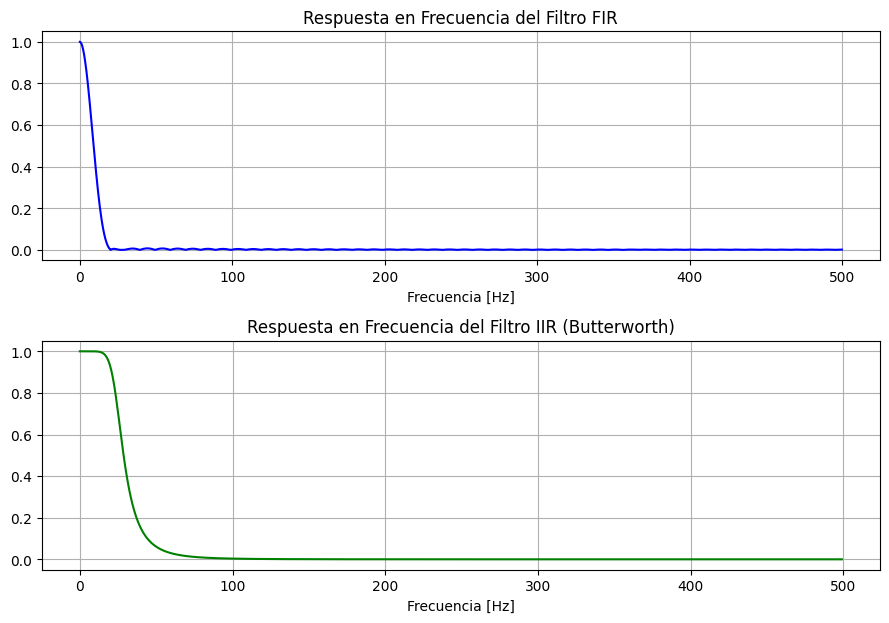

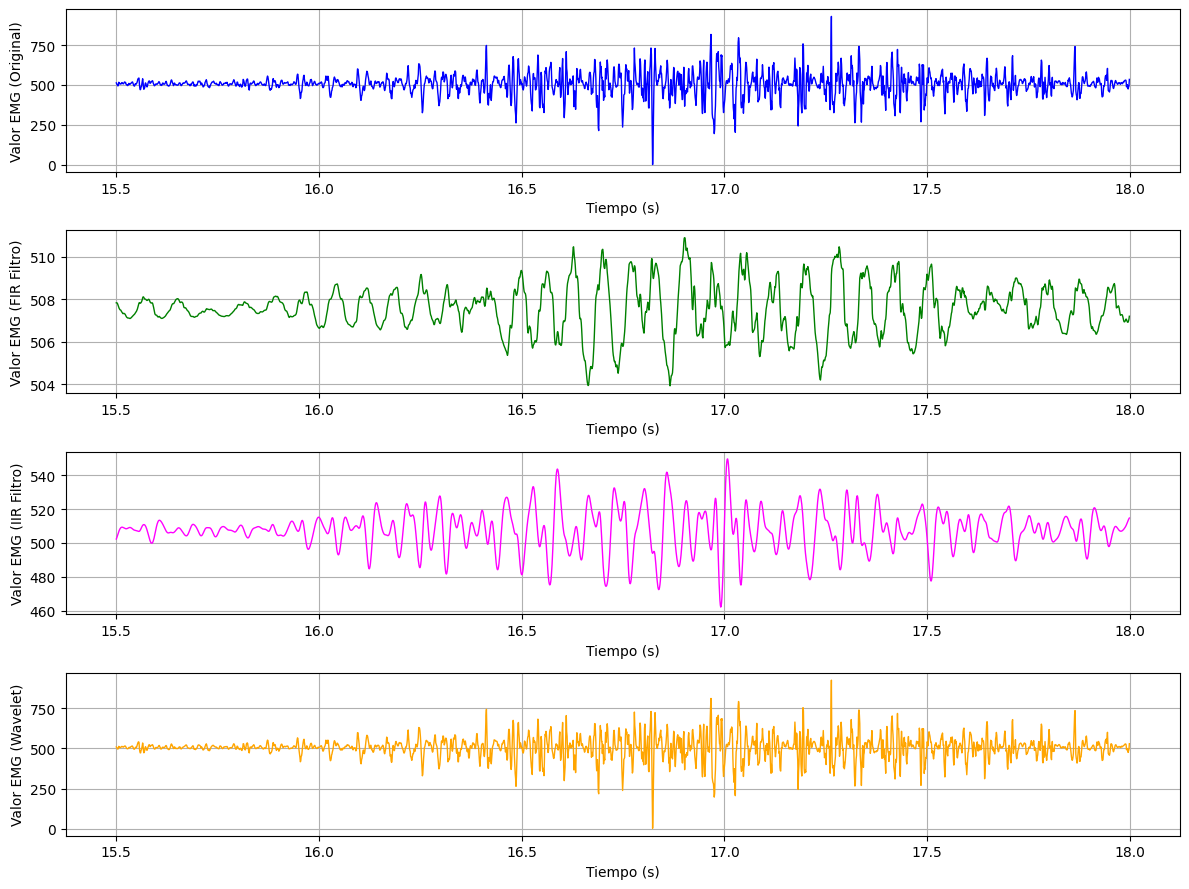

SNR para el filtro FIR: 17.38 dB
SNR para el filtro IIR: 17.12 dB
SNR para el filtro Wavelet: 46.08 dB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt

# Función para calcular la SNR utilizando la fórmula del paper
def calculate_snr(denoised_signal, original_signal):
    signal_power = np.mean(denoised_signal ** 2)
    noise_power = np.mean((original_signal - denoised_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Función para aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposición
def wavelet_denoising(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(denoised_coeffs, wavelet)
    return denoised_signal

# Cargar los datos desde el archivo TXT
archivo_txt = "text_EMG.txt"
datos_emg = np.loadtxt(archivo_txt)
emg = datos_emg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(emg)) / frecuencia_muestreo

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.05
cutoff_frequency_iir = 0.05

# Diseñar filtros
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir, window='hamming', fs=frecuencia_muestreo)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
# El filtro Wavelet no es un filtro en el dominio de la frecuencia

# Aplicar los filtros
emg_fir = lfilter(fir_filter, 1.0, emg)
emg_iir = lfilter(iir_filter[0], iir_filter[1], emg)

# Aplicar el filtrado con wavelet Daubechies 4 y 3 niveles de descomposición
emg_wavelet = wavelet_denoising(emg, wavelet='db4', level=3)

# Define el intervalo de tiempo para visualizar (segundos) durante una contracción fuerte
inicio_segundo = 15.5
fin_segundo = 18
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas durante una contracción fuerte
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Original)')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_fir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (FIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_iir[inicio_muestra:fin_muestra], lw=1, color='magenta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (IIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], emg_wavelet[inicio_muestra:fin_muestra], lw=1, color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor EMG (Wavelet)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular y mostrar la SNR para cada filtro utilizando la fórmula del paper
snr_fir = calculate_snr(emg_fir[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])
snr_iir = calculate_snr(emg_iir[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])
snr_wavelet = calculate_snr(emg_wavelet[inicio_muestra:fin_muestra], emg[inicio_muestra:fin_muestra])

print(f"SNR para el filtro FIR: {snr_fir:.2f} dB")
print(f"SNR para el filtro IIR: {snr_iir:.2f} dB")
print(f"SNR para el filtro Wavelet: {snr_wavelet:.2f} dB")